In [69]:
!pip install -U sentence-transformers

Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.4.1.2)


In [151]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import pickle

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.2)
import umap

In [152]:
embedder = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

In [153]:
lang = 'malayalam'

data_dir = '/content/drive/MyDrive/RA | Spring 2021/RA | Fall 2020/erfan-aileen-khyati/eacl2021-hope-speech/final-submission/Test Set Analysis/'
# train_df = pd.read_csv(data_dir+lang+'_hope_train.csv',
#                        names=['text', 'label'], delimiter='\t', index_col=False)
# val_df = pd.read_csv(data_dir+lang+'_hope_dev.csv',
#                      names=['text', 'label'], delimiter='\t', index_col=False)
test_df = pd.read_csv(data_dir+'TeamUNCC_'+lang+'.csv', index_col=False)

In [154]:
cache_path = '/content/drive/MyDrive/RA | Spring 2021/RA | Fall 2020/erfan-aileen-khyati/eacl2021-hope-speech/k-experiments/new/'+lang+'/'
try:
  with open(cache_path+'corpus_embeddings_test.p', 'rb') as rd:
    corpus_embeddings_test = pickle.load(rd)
    cached_test = True
    print('Loaded from cache!')
except FileNotFoundError:
  corpus_embeddings_test = embedder.encode(test_df['text'].values, show_progress_bar=True)
  cached_test = False

if not cached_test:
  with open(cache_path+'corpus_embeddings_test.p', 'wb') as wr:
    pickle.dump(corpus_embeddings_test, wr)

Loaded from cache!


In [155]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clustering_model.fit(corpus_embeddings_test)
cluster_assignment = clustering_model.labels_

y_pred = clustering_model.predict(corpus_embeddings_test)

In [156]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus_embeddings_test[sentence_id])

In [157]:
print(len(corpus_embeddings_test))
print(len(test_df))
print(len(y_pred))

1071
1071
1071


In [158]:
test_df['k-means-clusters'] = y_pred

In [159]:
test_df.head(2)

,id,text,label,label_pred,correct,k-means-clusters
0,mala_sent_1,അതെ അണപൊട്ടി ഒഴുകുകയാണ്,Non_hope_speech,Non_hope_speech,True,0
1,mala_sent_2,കെവിൻ avde pettupoyi🤣🤣🤣,Non_hope_speech,Non_hope_speech,True,1


In [160]:
test_df.to_csv(cache_path+'cluster-results.csv', index=False)

In [161]:
umap_reducer = umap.UMAP()
reduced_dim = umap_reducer.fit_transform(corpus_embeddings_test)
reduced_dim.shape

(1071, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


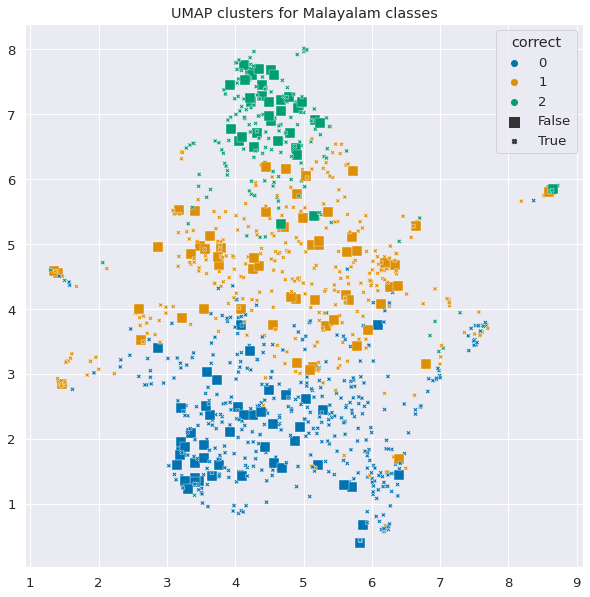

In [165]:
palette = sns.color_palette("colorblind")[:3]
markers = {True: "X", False: "s"}
sns.scatterplot(reduced_dim[:,0], reduced_dim[:,1], hue=y_pred, style=test_df['correct'], 
                markers=markers, size=test_df['correct'], sizes=(20, 100), palette=palette)
plt.title('UMAP clusters for Malayalam classes')
plt.savefig(cache_path+"umap_clusters.png")
plt.show()

In [166]:
test_df[(test_df['k-means-clusters']==2) & (test_df['correct']==False)].head(20)

,id,text,label,label_pred,correct,k-means-clusters
17,mala_sent_18,@Vyas Deep ningal enthinod enthineyanu connect...,Non_hope_speech,Hope_speech,False,2
40,mala_sent_41,myree anu ee nattil kundanmare valaran anuvath...,Non_hope_speech,Hope_speech,False,2
48,mala_sent_49,@Salman Faris Pakshe manassilaayikkollum eppoo...,Non_hope_speech,Hope_speech,False,2
55,mala_sent_56,Sahajeevikale avarde vishamathakalum budhimutt...,Hope_speech,Non_hope_speech,False,2
68,mala_sent_69,@anees hamza ningale paranjittu karyamilla..nN...,Non_hope_speech,Hope_speech,False,2
75,mala_sent_76,Ente makanum ithupole nalla arivum attitude um...,Hope_speech,Non_hope_speech,False,2
109,mala_sent_110,Avarea avarude vazhiku vidu.enthallam karyagal...,Non_hope_speech,Hope_speech,False,2
154,mala_sent_155,Ayooo yathe plz sahikan pattunilla eniku eniku...,Hope_speech,Non_hope_speech,False,2
214,mala_sent_215,Nchangalude evde edupolethey case undaayirunnu...,Non_hope_speech,Hope_speech,False,2
228,mala_sent_229,Eth vichitra logam onnum alla... ee manushar ...,Hope_speech,Non_hope_speech,False,2
